Define paths

In [100]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############

from numerical.cn_plot import plot1D, surfpattern
# from numerical.countPeaksAnalysisFunctions import countPeaks
# from numerical.fourierAnalysisFunctions import entropyFunction
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


In [102]:
def find_wavelenght(U,x_grid,showplot1D=True):
    peaks = [0, 0]
    peaks[0], _ = find_peaks(U[0], prominence=0.1)
    peaks[1], _ = find_peaks(U[1], prominence=0.1)

    # Calculate the wavelength
    wavelength_x = np.mean(np.diff(x_grid[peaks[0]]))
    wavelength_y = np.mean(np.diff(x_grid[peaks[1]]))
    avg_wavelength = np.mean([wavelength_x, wavelength_y])
    # Plot the 1D signal and peaks
    if showplot1D:
        plot1D(U, peaks=peaks)

    return  avg_wavelength


    

In [105]:
x_grid

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

Define variables and upload data for figures

In [103]:
circuit_n='turinghill'
variant= 4
n_species=2
mechanism='nogrowth'
folder_path = modellingpath + '/growth/out/numerical/turinghill/nogrowth/simulation/turinghill_variant4_nogrowth'
# parID=41018#[41018,30997]
# parID=41018#[41018,30997]
L=100; dx =0.1; J = int(L/dx)
T =20000; dt = 0.02; N = int(T/dt)
boundaryCoeff=1;rate=0.1
x_grid = np.array([j*dx for j in range(J)])
n_param_sets = 2000000
filename= lambda mechanism, parID: 'circuit%s_variant%s_bc%s_%s_rate%s_ID%s_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundaryCoeff, mechanism,rate,parID,L,J,T,N)
parID = '377638.0'

parID_list = pickle.load( open( folder_path + '/parID_list_%s.pkl'%filename(mechanism, 'x'), 'rb'))

lsa_df= pickle.load( open(modellingpath + "/growth/out/analytical/turing/turing_df_%s_variant%r_%rparametersets.pkl"%(circuit_n,variant,n_param_sets), "rb"))


Plot solution U with peaks

2.7397260273972606 4.0125
4.878048780487806 nan
2.127659574468085 2.8323529411764707
3.773584905660377 nan
1.7094017094017093 2.62972972972973
6.249999999999999 7.4957142857142856
1.5873015873015872 nan
1.1976047904191616 3.343103448275862
2.02020202020202 2.675
1.3888888888888888 1.970980392156863
3.1746031746031744 4.326190476190476
1.3157894736842106 2.1357989464442495
9.090909090909092 12.65
2.531645569620253 3.4464285714285716
4.444444444444445 6.217857142857144
2.7397260273972606 4.191304347826088
5.882352941176469 11.515
3.5087719298245617 6.264285714285715
1.666666666666667 nan
1.7241379310344827 4.790000000000001
1.8181818181818181 nan
2.5641025641025643 nan
5.0 nan
2.0408163265306123 2.9484848484848483
8.0 12.6
4.0 5.2058823529411775
2.173913043478261 4.790000000000001
1.8518518518518519 2.242282196969697
2.298850574712644 3.1994791666666664
3.571428571428571 5.264705882352941
1.149425287356322 2.292727272727273
4.545454545454546 9.427777777777779
1.8867924528301885 2.2035679

(0.0, 10.0)

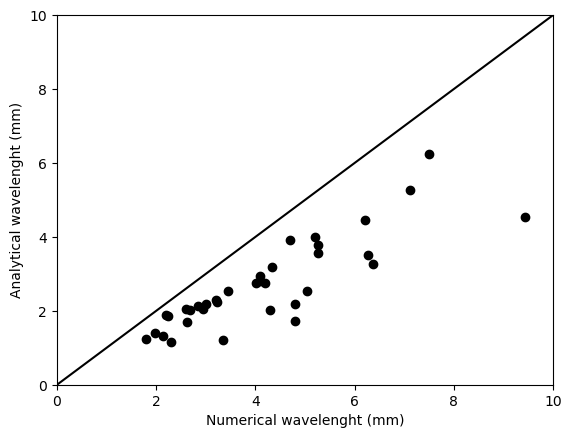

In [117]:
numerical_wavelenght_dict = {}
analytical_wavelenght_dict = {}

for parID in parID_list:
    parID_split = [int(x) for x in parID.split(".")]
    lsa_df.loc[parID_split[0], parID_split[1]]
    analytical_wavelenght_dict[parID] = lsa_df.loc[parID_split[0], parID_split[1]]['estimated_wvl']
    U_final = pickle.load( open( folder_path + '/2Dfinal_%s.pkl'%filename(mechanism, parID), 'rb'))
    numerical_wavelenght_dict[parID] = find_wavelenght(U_final, x_grid,showplot1D=False)
    print(analytical_wavelenght_dict[parID], numerical_wavelenght_dict[parID])
plt.scatter(numerical_wavelenght_dict.values(), analytical_wavelenght_dict.values(),color='black')
plt.plot([0, 10], [0, 10], color='black')
plt.xlabel("Numerical wavelenght (mm)")
plt.ylabel("Analytical wavelenght (mm)")
plt.xlim(0, 10)
plt.ylim(0, 10)




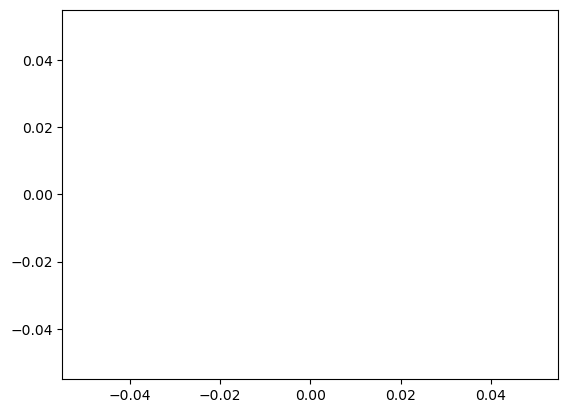